In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

word_importances_300 = pd.read_csv("vocabulary_importances.csv")
word_importances_normal = pd.read_csv("vocabulary_importances_normal.csv")
word_importances_upper2lower = pd.read_csv("vocabulary_importances_upper2lower.csv")

Populating the interactive namespace from numpy and matplotlib


In [60]:
top_ten_300 = word_importances_300.loc[np.arange(10)].vocabulary
top_ten_normal = word_importances_normal.loc[np.arange(10)].vocabulary
top_ten_upper2lower = word_importances_upper2lower.loc[np.arange(10)].vocabulary

In [69]:
top_words = set(top_ten_300).union(set(top_ten_normal)).union(set(top_ten_upper2lower))
top_words

{'Cool',
 'Funny',
 'Useful',
 'amazing',
 'best',
 'delicious',
 'food',
 'go',
 'good',
 'great',
 'love',
 'ok',
 'pizza',
 'place',
 'second',
 'service',
 'worst'}

In [75]:
df_300 = word_importances_300[[word in top_ten_words for word in word_importances_300.vocabulary]]
df_normal = word_importances_normal[[word in top_ten_words for word in word_importances_normal.vocabulary]]
df_u2l = word_importances_upper2lower[[word in top_ten_words for word in word_importances_upper2lower.vocabulary]]

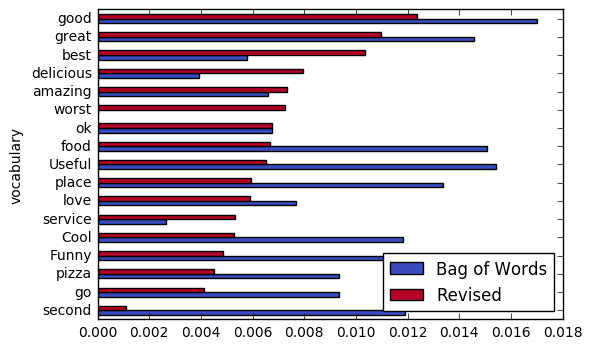

In [117]:
merged_df = df_normal.merge(df_u2l, on="vocabulary", how="outer")
merged_df["Bag of Words"] = merged_df.importances_x
merged_df["Revised"] = merged_df.importances_y
merged_df = merged_df.sort_values("Revised", ascending=True) # sort alphabetically
merged_df.plot.barh("vocabulary", y=["Bag of Words", "Revised"], colormap="coolwarm")

In [5]:
word_importances_upper_202 = word_importances_upper2lower[:203]

In [6]:
importances_202 = word_importances_upper_202.importances.values

In [146]:
sumup = word_importances_upper_202.importances.sum()

In [149]:
word_importances.loc[[0]].indices.values[0]
length = len(word_importances)
length_u = len(word_importances_upper_202)

In [118]:
word_importances_upper_202['new_importances'] = importances_202/sumup

D:\Anaconda2.7\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [151]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
standardd =  word_importances.stdeviation
standardd_normal = word_importances_normal.stdevation
standardd_upper = word_importances_upper_202.stdevation
standardd = standardd.values
standardd_normal = standardd_normal.values
standardd_upper = standardd_upper.values

In [155]:
indices = word_importances.indices.values
importances = word_importances.importances.values
#standardd =  word_importances.stdevation.values
voca = word_importances.vocabulary.values

indices_n = word_importances_normal.indices.values
importances_n = word_importances_normal.importances.values
voca_n = word_importances_normal.vocabulary.values

indices_u = word_importances_upper_202.indices.values
importances_u = word_importances_upper_202.new_importances.values
voca_u = word_importances_upper_202.vocabulary.values
type(indices)

AttributeError: 'DataFrame' object has no attribute 'new_importances'

In [156]:
voca[:40]

array(['good', 'great', 'food', 'best', 'place', 'delicious', 'service',
       'ok', 'amazing', 'love', 'friendly', 'like', 'bad', 'horrible',
       'pizza', 'go', 'get', 'nice', 'back', 'time', 'one', 'order',
       'mexican', 'would', 'awesome', 'rude', 'little', 'decent',
       'ordered', 'really', 'favorite', 'never', 'terrible', 'coffee',
       'chicken', 'pretty', 'always', 'fresh', 'much', 'location'], dtype=object)

In [157]:
voca_n[:40]

array(['good', 'Useful', 'food', 'great', 'place', 'second', 'Cool',
       'Funny', 'pizza', 'go', 'beef', 'think', 'like', 'back', 'get',
       'definitely', 'one', 'mexican', 'order', 'friendly', 'nice', 'love',
       'cheese', 'little', 'really', 'would', 'close', 'restaurant', 'bad',
       'ok', 'ordered', 'location', 'amazing', 'tacos', 'much', 'spicy',
       'chicken', 'fresh', 'always', 'never'], dtype=object)

In [158]:
voca_u[:40]

array(['good', 'great', 'best', 'delicious', 'amazing', 'worst', 'ok',
       'food', 'Useful', 'place', 'love', 'horrible', 'service', 'Cool',
       'bad', 'decent', 'friendly', 'Funny', 'terrible', 'pizza',
       'awesome', 'like', 'favorite', 'would', 'nice', 'go', 'little',
       'order', 'rude', 'time', 'ordered', 'bland', 'back', 'never', 'get',
       'one', 'pretty', 'mexican', 'really', 'always'], dtype=object)

In [159]:
len_array = np.array([i for i in range(40)])

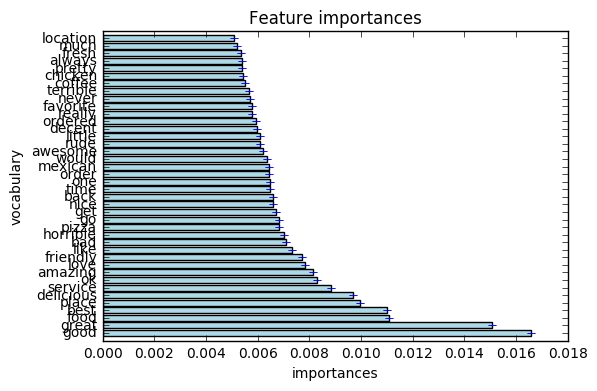

In [160]:
plt.figure()
plt.title("Feature importances")
plt.barh(len_array, importances[len_array],
       color="lightblue",yerr = standardd[len_array],align="center")
plt.yticks(len_array, voca[len_array])
plt.xlabel("importances")
plt.ylabel("vocabulary")
plt.ylim([-1, len(len_array)])
plt.show()

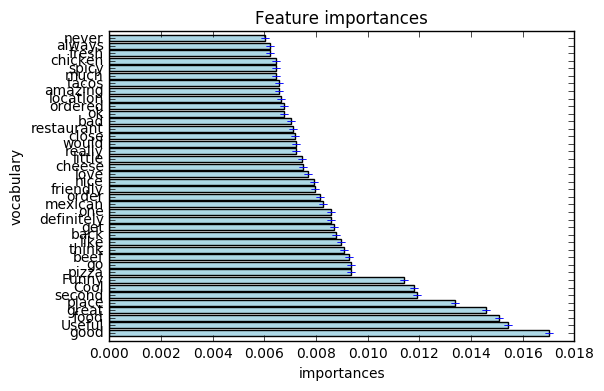

In [161]:
plt.figure()
plt.title("Feature importances")
plt.barh(len_array, importances_n[len_array],
       color="lightblue",yerr = standardd_normal[len_array],align="center")
plt.yticks(len_array, voca_n[len_array])
plt.xlabel("importances")
plt.ylabel("vocabulary")
plt.ylim([-1, len(len_array)])
plt.show()

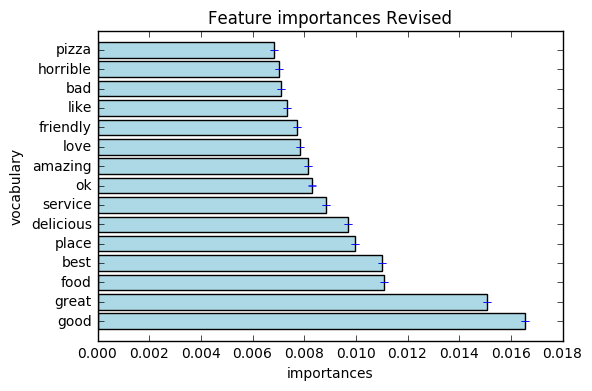

In [162]:
len_array = np.array([i for i in range(15)])
plt.figure()
plt.title("Feature importances Revised")
plt.barh(len_array, importances[len_array],
       color="lightblue",yerr = standardd[len_array],align="center")
plt.yticks(len_array, voca[len_array])
plt.xlabel("importances")
plt.ylabel("vocabulary")
plt.ylim([-1, len(len_array)])
plt.show()

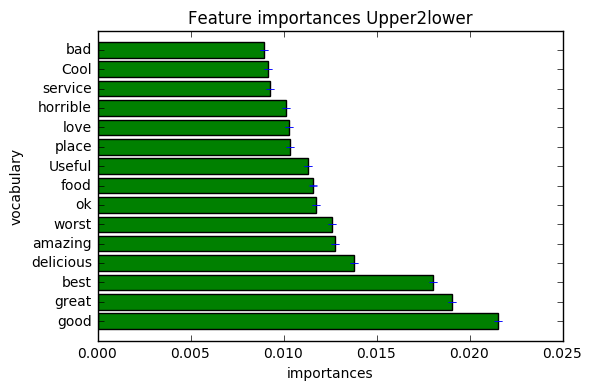

In [163]:
len_array = np.array([i for i in range(15)])
plt.figure()
plt.title("Feature importances Upper2lower")
plt.barh(len_array, importances_u[len_array],
       color="green",yerr = standardd_upper[len_array],align="center")
plt.yticks(len_array, voca_u[len_array])
plt.xlabel("importances")
plt.ylabel("vocabulary")
plt.ylim([-1, len(len_array)])
plt.show()

In [164]:
np.std(np.array([0,1,5,3,8,5,29,3,9]))


8.2596744622425788

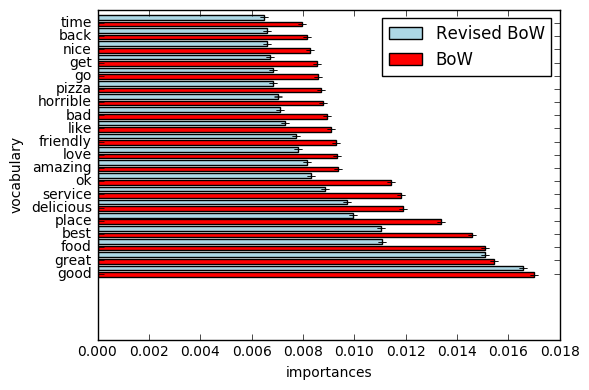

In [165]:
len_array = np.array([i for i in range(20)])
fig, ax = plt.subplots()
opacity = 0.8
barwidth = 0.25
rects1 = plt.barh(len_array + barwidth, importances[len_array],2*barwidth - 0.15,
       color="lightblue",yerr = standardd[len_array], ecolor = 'black',
                 label='Revised BoW')
 
rects2 = plt.barh(len_array - barwidth, importances_n[len_array],2*barwidth - 0.15,
       color="red",yerr = standardd_normal[len_array],ecolor = 'black',
                 label='BoW')
 
plt.yticks(len_array, voca[len_array])
plt.xlabel("importances")
plt.ylabel("vocabulary")
plt.legend()
 
plt.tight_layout()
plt.show()

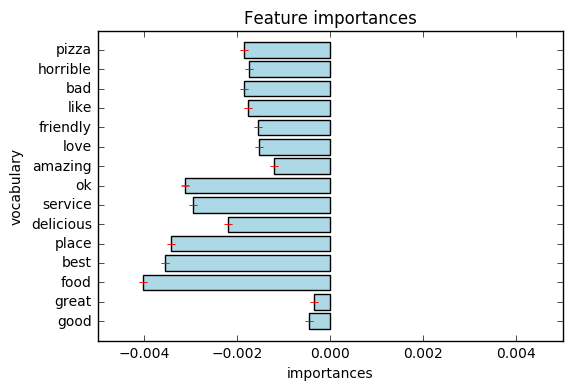

In [166]:
len_array = np.array([i for i in range(15)])
plt.figure()
plt.title("Feature importances")
plt.barh(len_array, importances[len_array] - importances_n[len_array],
       color="lightblue",yerr = standardd[len_array],ecolor = 'red',align="center")
plt.yticks(len_array, voca[len_array])
plt.xlabel("importances")
plt.ylabel("vocabulary")
plt.ylim([-1, len(len_array)])
plt.xlim([-0.005,0.005])
plt.show()

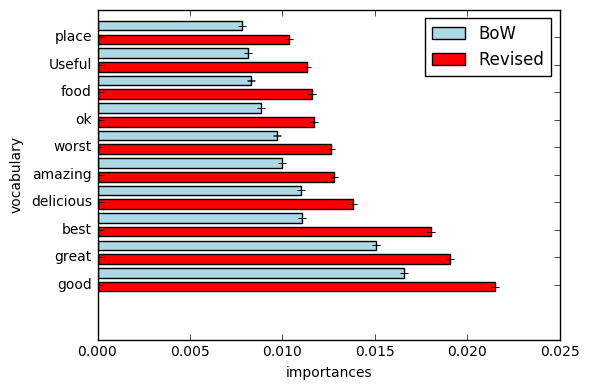

In [172]:
len_array = np.array([i for i in range(10)])
fig, ax = plt.subplots()
opacity = 0.8
barwidth = 0.25
rects1 = plt.barh(len_array + barwidth, importances[len_array],2*barwidth - 0.15,
       color="lightblue",yerr = standardd[len_array], ecolor = 'black',
                 label='BoW')
 
rects2 = plt.barh(len_array - barwidth, importances_u[len_array],2*barwidth - 0.15,
       color="red",yerr = standardd_upper[len_array],ecolor = 'black',
                 label='Revised')
 
plt.yticks(len_array, voca_u[len_array])
plt.xlabel("importances")
plt.ylabel("vocabulary")
plt.legend()
 
plt.tight_layout()
plt.show()

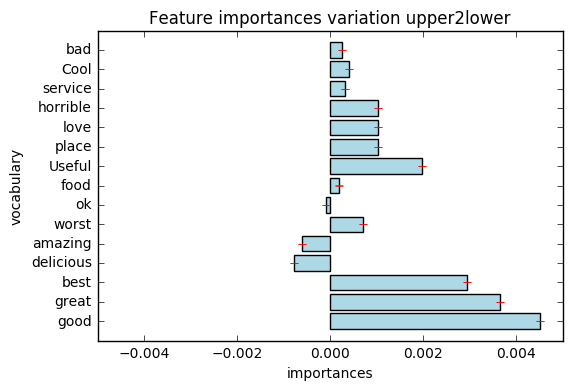

In [168]:
len_array = np.array([i for i in range(15)])
plt.figure()
plt.title("Feature importances variation upper2lower")
plt.barh(len_array, importances_u[len_array] - importances_n[len_array],
       color="lightblue",yerr = standardd[len_array],ecolor = 'red',align="center")
plt.yticks(len_array, voca_u[len_array])
plt.xlabel("importances")
plt.ylabel("vocabulary")
plt.ylim([-1, len(len_array)])
plt.xlim([-0.005,0.005])
plt.show()

In [ ]:
# How to write the matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
new_dict_list = []
word_dict = vectorizer.vocabulary_
word_dict['Funny'] = 200
word_dict['Cool'] = 201
word_dict['Useful'] = 202
for i in range(0,len(indices)):
    temp_dict = {}
    temp_dict['indices'] = indices[i]
    temp_dict['importances'] = importances[indices[i]]
    temp_dict['stdevication'] = std[indices[i]]
    temp_dict['vocabulary'] = [key for key, value in word_dict.items() if value == indices[i]][0] 
    new_dict_list.append(temp_dict)

df = pd.DataFrame(new_dict_list)
df.to_csv("D:\\Desktop\\Material\\STAT 154\\Kaggle\\Yelp_Kaggle\\vocabulary_importances_normal.csv", header = ['importances','indices','stdevation','vocabulary'])